In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import time

attrib = read_csv('attributes.csv', delim_whitespace = True)
data  =  read_csv('communities.data', names = attrib['attributes'])
data.shape

(1994, 128)

In [2]:
data.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 128 columns]

In [3]:
data.describe()

state         fold   population  householdsize  racepctblack  \
count  1994.000000  1994.000000  1994.000000    1994.000000   1994.000000   
mean     28.683551     5.493982     0.057593       0.463395      0.179629   
std      16.397553     2.873694     0.126906       0.163717      0.253442   
min       1.000000     1.000000     0.000000       0.000000      0.000000   
25%      12.000000     3.000000     0.010000       0.350000      0.020000   
50%      34.000000     5.000000     0.020000       0.440000      0.060000   
75%      42.000000     8.000000     0.050000       0.540000      0.230000   
max      56.000000    10.000000     1.000000       1.000000      1.000000   

       racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
count   1994.000000   1994.000000  1994.000000  1994.000000  1994.000000   
mean       0.753716      0.153681     0.144022     0.424218     0.493867   
std        0.244039      0.208877     0.232492     0.155196     0.143564   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.630000      0.040000     0.010000     0.340000     0.410000   
50%        0.850000      0.070000     0.040000     0.400000     0.480000   
75%        0.940000      0.170000     0.160000     0.470000     0.540000   
max        1.000000      1.000000     1.000000     1.000000     1.000000   

              ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
count         ...              1994.000000       1994.000000     1994.000000   
mean          ...                 0.215552          0.608892        0.535050   
std           ...                 0.231134          0.204329        0.181352   
min           ...                 0.000000          0.000000        0.000000   
25%           ...                 0.060000          0.470000        0.420000   
50%           ...                 0.130000          0.630000        0.540000   
75%           ...                 0.280000          0.777500        0.660000   
max           ...                 1.000000          1.000000        1.000000   

       PctSameCity85  PctSameState85     LandArea      PopDens  \
count    1994.000000     1994.000000  1994.000000  1994.000000   
mean        0.626424        0.651530     0.065231     0.232854   
std         0.200521        0.198221     0.109459     0.203092   
min         0.000000        0.000000     0.000000     0.000000   
25%         0.520000        0.560000     0.020000     0.100000   
50%         0.670000        0.700000     0.040000     0.170000   
75%         0.770000        0.790000     0.070000     0.280000   
max         1.000000        1.000000     1.000000     1.000000   

       PctUsePubTrans  LemasPctOfficDrugUn  ViolentCrimesPerPop  
count     1994.000000          1994.000000          1994.000000  
mean         0.161685             0.094052             0.237979  
std          0.229055             0.240328             0.232985  
min          0.000000             0.000000             0.000000  
25%          0.020000             0.000000             0.070000  
50%          0.070000             0.000000             0.150000  
75%          0.190000             0.000000             0.330000  
max          1.000000             1.000000             1.000000  

[8 rows x 102 columns]

# Clean data

In [4]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 123 columns]

In [5]:
data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

# Impute mean values for samples with missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

# Remove empty value
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  \
0         0.17         0.34         0.47         0.29        0.32   
1         0.07         0.26         0.59         0.35        0.27   
2         0.04         0.39         0.47         0.28        0.32   
3         0.10         0.51         0.50         0.34        0.21   
4         0.05         0.38         0.38         0.23        0.36   

          ...           PctForeignBorn  PctBornSameState  PctSameHouse85  \
0         ...                     0.12              0.42            0.50   
1         ...                     0.21              0.50            0.34   
2         ...                     0.14              0.49            0.54   
3         ...                     0.19              0.30            0.73   
4         ...                     0.11              0.72            0.64   

   PctSameCity85  PctSameState85  LandArea  PopDens  PctUsePubTrans  \
0           0.51            0.64      0.12     0.26            0.20   
1           0.60            0.52      0.02     0.12            0.45   
2           0.67            0.56      0.01     0.21            0.02   
3           0.64            0.65      0.02     0.39            0.28   
4           0.61            0.53      0.04     0.09            0.02   

   LemasPctOfficDrugUn  ViolentCrimesPerPop  
0                 0.32                 0.20  
1                 0.00                 0.67  
2                 0.00                 0.43  
3                 0.00                 0.12  
4                 0.00                 0.03  

[5 rows x 101 columns]

# Get the array X and Y

In [6]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

In [7]:
print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


# Compute Beta

In [8]:
def FindBeta(X, y, lamda):
    t1_start = time.perf_counter()
    t2_start = time.process_time()
    p = X.shape[1]
    n = X.shape[0]

    I = np.eye(p, dtype=int)
    X_T = np.transpose(X)
    inver = np.linalg.inv(np.dot(X_T, X) + n*lamda*I)
    beta = np.dot(np.dot(inver, X_T), y)
    t1_stop = time.perf_counter()
    t2_stop = time.process_time()
    t1 = t1_stop-t1_start
    t2 = t2_stop-t2_start
    #print("Elapsed time: %.5f [seconds]" % t1)
    #print("CPU process time: %.5f [seconds]" % t2)
    
    return [beta, t1, t2]

beta, t1, t2 = FindBeta(X, y, 1)

In [9]:
beta

array([ 0.00775388,  0.00518976,  0.02770382, -0.01095481,  0.00288971,
        0.00883976,  0.00650567,  0.00939366,  0.00597656,  0.00944178,
        0.0078918 ,  0.01852563, -0.00471099,  0.00147669, -0.00028669,
       -0.00489621,  0.01076204,  0.02115624,  0.00638285, -0.00431909,
       -0.00144396,  0.00297538, -0.0010508 ,  0.0016477 ,  0.00267006,
        0.002658  ,  0.00199588,  0.00903632,  0.01937562,  0.01431567,
        0.01764024, -0.00171595,  0.01802986,  0.00121853,  0.00389638,
        0.00563415,  0.01248608,  0.00025235,  0.02204463,  0.01320891,
        0.02217526,  0.0231119 ,  0.00943456, -0.00994239, -0.01112845,
       -0.00935701, -0.00840307,  0.00810287,  0.005538  ,  0.0081096 ,
        0.02831085,  0.00375881,  0.0086143 ,  0.01016984,  0.01161429,
        0.01316151,  0.00781672,  0.00844904,  0.00883062,  0.00915826,
        0.00844457,  0.00833258,  0.01253079,  0.00962954,  0.0053951 ,
        0.00398623,  0.01154542, -0.00364678,  0.01384398,  0.01

In [10]:
t2

0.0627819999999999

In [11]:
def RepeatFindBeta(r, X, y, lamda):
    t = []
    for i in range(r):
        beta, t1, t2 = FindBeta(X, y, lamda)
        t.append([t1, t2])
    return np.average(t, axis=0)

# Arange(7, 100, 10)

In [12]:
# Vary the feature size
list_1 = np.arange(7,100,10)
# set repeat times
rep = 100
# Elapsed time & CPU time
t = []

for i in list_1:
    X = data.iloc[:, 0:i].values
    y = data.iloc[:, 100].values
    t_t = RepeatFindBeta(rep, X, y, 1)
    t.append(t_t)
t = np.array(t) # change to np.array for slicing

## Visualization

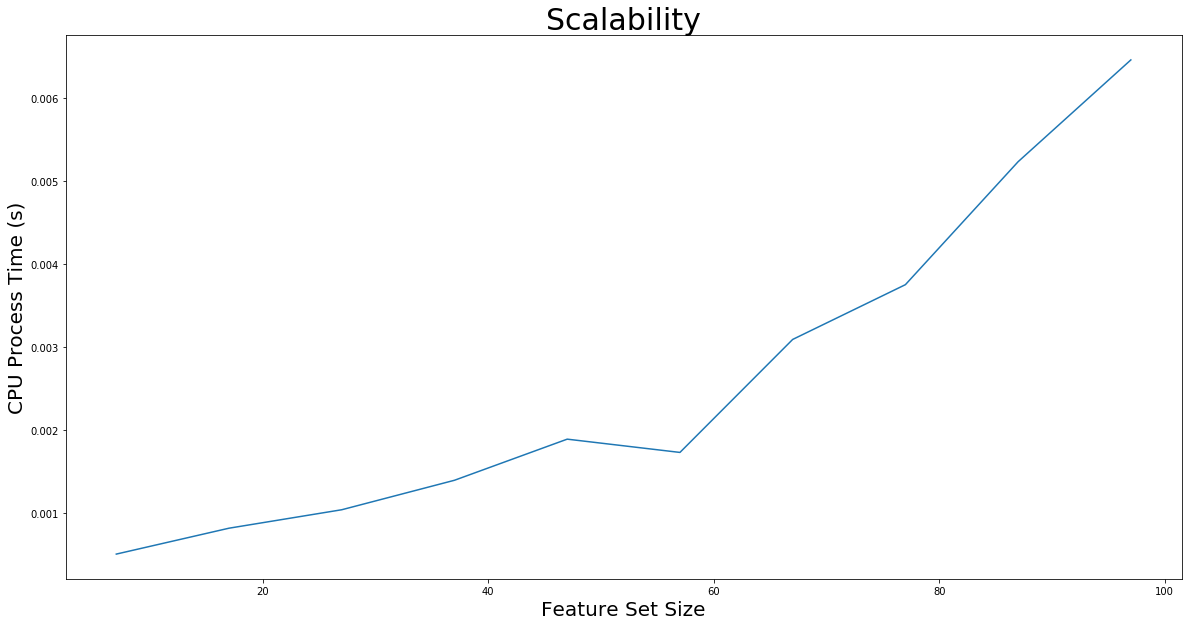

In [13]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.plot(list_1, t[:,1])
#plt.plot(0, 0.1286, marker='o', markersize=3, color='red')
#plt.legend(fontsize=20, loc='right')
plt.title('Scalability', fontsize = 30)
plt.xlabel('Feature Set Size', fontsize = 20)
plt.ylabel('CPU Process Time (s)', fontsize = 20)
plt.show()

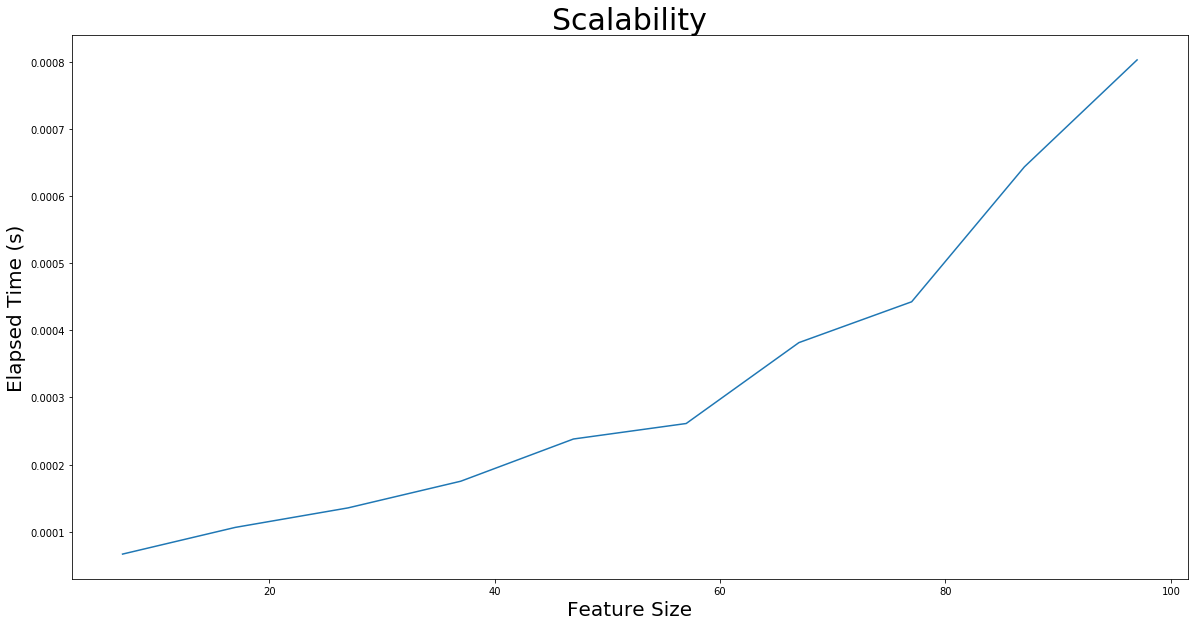

In [14]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.plot(list_1, t[:,0])
#plt.plot(0, 0.1286, marker='o', markersize=3, color='red')
#plt.legend(fontsize=20, loc='right')
plt.title('Scalability', fontsize = 30)
plt.xlabel('Feature Size', fontsize = 20)
plt.ylabel('Elapsed Time (s)', fontsize = 20)
plt.show()

# Arrange(7,100,1)

In [15]:
# Vary the feature size
list_1 = np.arange(7,100)
# set repeat times
rep = 100
# Elapsed time & CPU time
t = []
for i in list_1:
    X = data.iloc[:, 0:i].values
    y = data.iloc[:, 100].values
    t_t = RepeatFindBeta(rep, X, y, 1)
    t.append(t_t)
t = np.array(t) # change to np.array for slicing

## Visualization

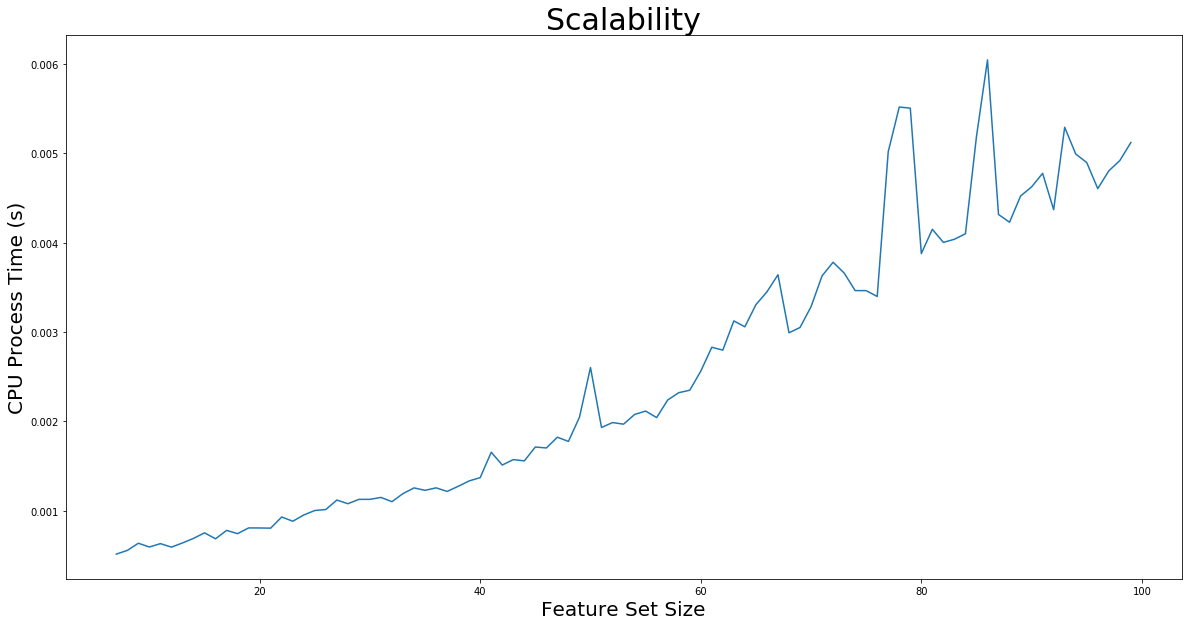

In [16]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.plot(list_1, t[:,1])
#plt.plot(0, 0.1286, marker='o', markersize=3, color='red')
#plt.legend(fontsize=20, loc='right')
plt.title('Scalability', fontsize = 30)
plt.xlabel('Feature Set Size', fontsize = 20)
plt.ylabel('CPU Process Time (s)', fontsize = 20)
plt.show()

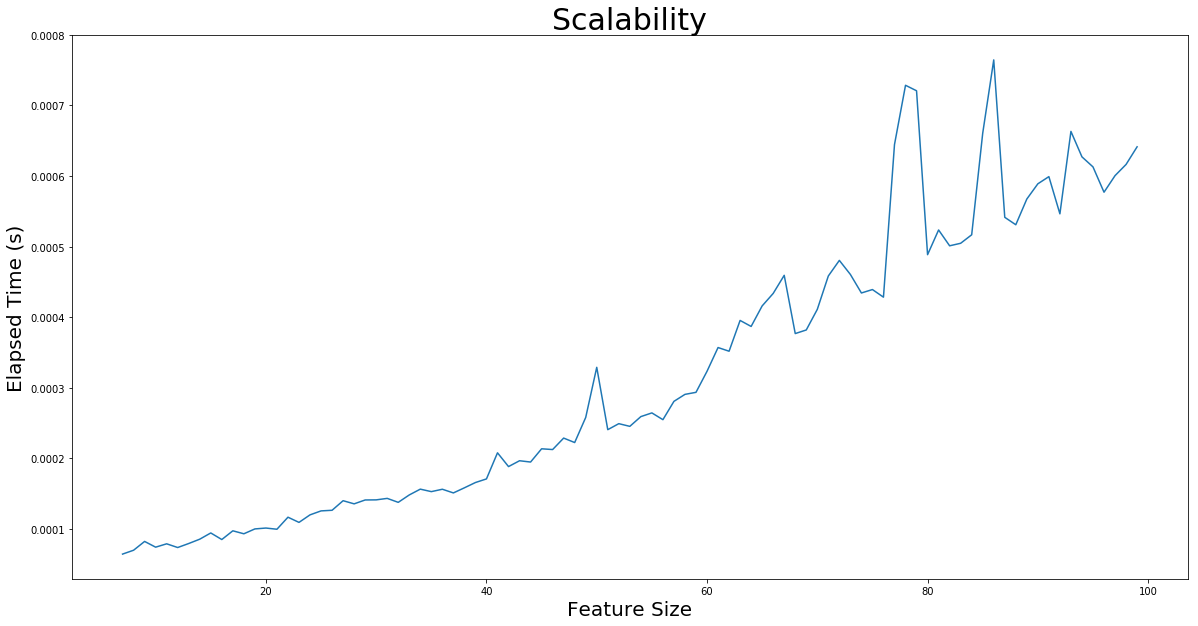

In [17]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.plot(list_1, t[:,0])
#plt.plot(0, 0.1286, marker='o', markersize=3, color='red')
#plt.legend(fontsize=20, loc='right')
plt.title('Scalability', fontsize = 30)
plt.xlabel('Feature Size', fontsize = 20)
plt.ylabel('Elapsed Time (s)', fontsize = 20)
plt.show()

In [18]:
a = np.arange(1,10)

In [19]:
type(a)

numpy.ndarray

In [20]:
a[a <= 3] =1

In [21]:
a

array([1, 1, 1, 4, 5, 6, 7, 8, 9])